<a href="https://colab.research.google.com/github/ykim71/covid19_policy/blob/main/Covid_cable_End_to_end_BERT_classifier_policy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Essentially a copy of [this Colab NB](https://colab.research.google.com/drive/1pTuQhug6Dhl9XalKB0zUGf4FIdYFlpcX?usp=sharing) from Chris McCormick and Nick Ryan

## Connect to Gdrive 

In [ ]:
from google.colab import drive

drive.mount("/content/drive", force_remount=True)

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
%cd drive/'My Drive'/covid_cable/

[Errno 2] No such file or directory: 'drive/My Drive/covid_cable/'
/Users/yujinkim/Google Drive/CME/cablenews_covid/bert_policy_covid


## GPU setting

In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

## Prep for Data 


> Making balance dataset by months


> can skip this and start from 'Spliting data'





In [ ]:
import pandas as pd
import numpy as np


In [ ]:

MARCH_NP = pd.read_excel('2020-03-23-Newspaper.xlsx', sheet_name="2020-03-24-06-49-29-CDT-Histori")
MARCH_TV = pd.read_excel('2020-03-23-Television.xlsx', sheet_name="2020-03-24-06-49-29-CDT-Histori")

cols = ['Message', 'Link Text', 'Description']

MARCH_NP['sentence'] = MARCH_NP[cols].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)
MARCH_NP['label'] = MARCH_NP['COVID']
print(MARCH_NP['label'].value_counts())

MARCH_TV['sentence'] = MARCH_TV[cols].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)
MARCH_TV['label'] = MARCH_TV['COVID']
print(MARCH_TV['label'].value_counts())


1.0    502
0.0    128
Name: label, dtype: int64
1.0    552
0.0    122
Name: label, dtype: int64


In [ ]:
APR_NP = pd.read_excel('Covid_Newspaper_April_20.xlsx', sheet_name="2020-04-21-12-28-12-CDT-Histori")
APR_TV = pd.read_excel('Covid_TV_April_20.xlsx', sheet_name="2020-04-21-12-29-09-CDT-Histori")

APR_NP['sentence'] = APR_NP[cols].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)
APR_NP['label'] = APR_NP['Covid']
print(APR_NP['label'].value_counts())

APR_TV['sentence'] = APR_TV[cols].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)
APR_TV['label'] = APR_TV['Covid']
print(APR_TV['label'].value_counts())


1.0    721
0.0    345
Name: label, dtype: int64
1.0    947
0.0    422
Name: label, dtype: int64


In [ ]:
JUNE_NP = pd.read_excel('JuneNP_full.xlsx', sheet_name="Sheet1")
JUNE_TV = pd.read_excel('JuneTVFullsample.xlsx', sheet_name="Sheet1")

JUNE_NP['sentence'] = JUNE_NP[cols].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)
JUNE_NP['label'] = JUNE_NP['Covid']
print(JUNE_NP['label'].value_counts())

JUNE_TV['sentence'] = JUNE_TV[cols].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)
JUNE_TV['label'] = JUNE_TV['Covid']
print(JUNE_TV['label'].value_counts())


0    789
1    462
Name: label, dtype: int64
0.0    1134
1.0     546
Name: label, dtype: int64


In [ ]:
cols2 = ['message', 'linktext', 'description']


In [ ]:
JULY = pd.read_excel('June_October_COVID450.xlsx', sheet_name="July(Jay)")

JULY['sentence'] = JULY[cols2].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)
JULY['label'] = JULY['COVID (1 = Yes, 0 = No)']
JULY['Created'] = JULY['created']
print(JULY['label'].value_counts())


0    69
1    31
Name: label, dtype: int64


In [ ]:
AUG = pd.read_excel('June_October_COVID450.xlsx', sheet_name="August(Jessica)")

AUG['sentence'] = AUG[cols2].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)
AUG['label'] = AUG['COVID (1 = Yes, 0 = No)']
AUG['Created'] = AUG['created']
print(AUG['label'].value_counts())


0    64
1    36
Name: label, dtype: int64


In [ ]:
AUG2 = pd.read_excel('AugSeptOct_COVID_600.xlsx', sheet_name="August(Ashley)")

AUG2['sentence'] = AUG2[cols2].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)
AUG2['label'] = AUG2['covid']
AUG2['Created'] = AUG2['created']
print(AUG2['label'].value_counts())


0    135
1     50
Name: label, dtype: int64


In [ ]:
SEP = pd.read_excel('June_October_COVID450.xlsx', sheet_name="September(Jay)")

SEP['sentence'] = SEP[cols2].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)
SEP['label'] = SEP['COVID (1 = Yes, 0 = No)']
SEP['Created'] = SEP['created']
print(SEP['label'].value_counts())


0    72
1    28
Name: label, dtype: int64


In [ ]:
SEP2 = pd.read_excel('AugSeptOct_COVID_600.xlsx', sheet_name="September(Jessica)")

SEP2['sentence'] = SEP2[cols2].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)
SEP2['label'] = SEP2['covid']
SEP2['Created'] = SEP2['created']
print(SEP2['label'].value_counts())


0    142
1     43
Name: label, dtype: int64


In [ ]:
OCT = pd.read_excel('June_October_COVID450.xlsx', sheet_name="October(Jessica)")

OCT['sentence'] = OCT[cols2].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)
OCT['label'] = OCT['COVID (1 = Yes, 0 = No)']
OCT['Created'] = OCT['created']
print(OCT['label'].value_counts())


0    72
1    28
Name: label, dtype: int64


In [ ]:
OCT2 = pd.read_excel('AugSeptOct_COVID_600.xlsx', sheet_name="October(Jay)")

OCT2['sentence'] = OCT2[cols2].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)
OCT2['label'] = OCT2['Covid']
OCT2['Created'] = OCT2['created']
print(OCT2['label'].value_counts())


0    173
1     57
Name: label, dtype: int64


In [ ]:
OCT3 = pd.read_excel('AugSeptOct_COVID_600.xlsx', sheet_name="ReliabilitySet")

OCT3['sentence'] = OCT3[cols2].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)
OCT3['label'] = OCT3['Ashley']
OCT3['Created'] = OCT3['created']
print(OCT3['label'].value_counts())


0    37
1    13
Name: label, dtype: int64


In [ ]:
Sept_Oct1 = pd.read_excel('COVIDCoding_Sept_Oct600.xlsx', sheet_name="Ashley")

Sept_Oct1['sentence'] = Sept_Oct1[cols2].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)
Sept_Oct1['label'] = Sept_Oct1['covid']
Sept_Oct1['Created'] = Sept_Oct1['created']
print(Sept_Oct1['label'].value_counts())


0    125
1     55
Name: label, dtype: int64


In [ ]:
Sept_Oct2 = pd.read_excel('COVIDCoding_Sept_Oct600.xlsx', sheet_name="Jessica")

Sept_Oct2['sentence'] = Sept_Oct2[cols2].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)
Sept_Oct2['label'] = Sept_Oct2['covid']
Sept_Oct2['Created'] = Sept_Oct2['created']
print(Sept_Oct2['label'].value_counts())


0    135
1     45
Name: label, dtype: int64


In [ ]:
Sept_Oct3 = pd.read_excel('COVIDCoding_Sept_Oct600.xlsx', sheet_name="Jay")

Sept_Oct3['sentence'] = Sept_Oct3[cols2].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)
Sept_Oct3['label'] = Sept_Oct3['Covid?']
Sept_Oct3['Created'] = Sept_Oct3['created']
print(Sept_Oct3['label'].value_counts())


0    136
1     44
Name: label, dtype: int64


In [ ]:
Sept_Oct4 = pd.read_excel('COVIDCoding_Sept_Oct600.xlsx', sheet_name="ReliabilitySet")

Sept_Oct4['sentence'] = Sept_Oct4[cols2].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)
Sept_Oct4['label'] = Sept_Oct4['Ashley']
Sept_Oct4['Created'] = Sept_Oct4['created']
print(Sept_Oct4['label'].value_counts())


0    41
1    19
Name: label, dtype: int64


In [ ]:
Aug_Sept_Oct1 = pd.read_excel('Aug_Sept_Oct_COVID_700.xlsx', sheet_name="Jessica")

Aug_Sept_Oct1['sentence'] = Aug_Sept_Oct1[cols2].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)
Aug_Sept_Oct1['label'] = Aug_Sept_Oct1['covid']
Aug_Sept_Oct1['Created'] = Aug_Sept_Oct1['created']
print(Aug_Sept_Oct1['label'].value_counts())


0    271
1     84
Name: label, dtype: int64


In [ ]:
Aug_Sept_Oct2 = pd.read_excel('Aug_Sept_Oct_COVID_700.xlsx', sheet_name="Jay")

Aug_Sept_Oct2['sentence'] = Aug_Sept_Oct2[cols2].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)
Aug_Sept_Oct2['label'] = Aug_Sept_Oct2['covid']
Aug_Sept_Oct2['Created'] = Aug_Sept_Oct2['created']
print(Aug_Sept_Oct2['label'].value_counts())


0    240
1    115
Name: label, dtype: int64


In [ ]:
Aug_Sept_Oct3 = pd.read_excel('Aug_Sept_Oct_COVID_700.xlsx', sheet_name="Reliability")

Aug_Sept_Oct3['sentence'] = Aug_Sept_Oct3[cols2].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)
Aug_Sept_Oct3['label'] = Aug_Sept_Oct3['Jessica']
Aug_Sept_Oct3['Created'] = Aug_Sept_Oct3['created']
print(Aug_Sept_Oct3['label'].value_counts())


0    40
1    10
Name: label, dtype: int64


In [ ]:
MARCH_NP = MARCH_NP[["Created", "sentence", "label"]] 
MARCH_TV = MARCH_TV[["Created", "sentence", "label"]] 
APR_NP = APR_NP[["Created", "sentence", "label"]] 
APR_TV = APR_TV[["Created", "sentence", "label"]] 
JUNE_NP = JUNE_NP[["Created", "sentence", "label"]] 
JUNE_TV = JUNE_TV[["Created", "sentence", "label"]] 

JULY = JULY[["Created", "sentence", "label"]] 
AUG = AUG[["Created", "sentence", "label"]] 
SEP = SEP[["Created", "sentence", "label"]] 
OCT = OCT[["Created", "sentence", "label"]] 

AUG2 = AUG2[["Created", "sentence", "label"]] 
SEP2 = SEP2[["Created", "sentence", "label"]] 
OCT2 = OCT2[["Created", "sentence", "label"]] 
OCT3 = OCT3[["Created", "sentence", "label"]] 

Sept_Oct1 = Sept_Oct1[["Created", "sentence", "label"]] 
Sept_Oct2 = Sept_Oct2[["Created", "sentence", "label"]] 
Sept_Oct3 = Sept_Oct3[["Created", "sentence", "label"]] 
Sept_Oct4 = Sept_Oct4[["Created", "sentence", "label"]] 


Aug_Sept_Oct1 = Aug_Sept_Oct1[["Created", "sentence", "label"]] 
Aug_Sept_Oct2 = Aug_Sept_Oct2[["Created", "sentence", "label"]] 
Aug_Sept_Oct3 = Aug_Sept_Oct3[["Created", "sentence", "label"]] 


In [ ]:
JUNE_NP = JUNE_NP.assign(category="JUNE_NP")
JUNE_TV = JUNE_TV.assign(category="JUNE_TV")

MARCH_NP = MARCH_NP.assign(category="MARCH_NP")
MARCH_TV = MARCH_TV.assign(category="MARCH_TV")

JULY = JULY.assign(category="JULY")

AUG = AUG.assign(category="AUG")
SEP = SEP.assign(category="SEP")
OCT = OCT.assign(category="OCT")

AUG2 = AUG2.assign(category="AUG")
SEP2 = SEP2.assign(category="SEP")
OCT2 = OCT2.assign(category="OCT")
OCT3 = OCT3.assign(category="OCT")

APR_NP = APR_NP.assign(category="APR_NP")
APR_TV = APR_TV.assign(category="APR_TV")


Sept_Oct1 = Sept_Oct1.assign(category="Sept_Oct")
Sept_Oct2 = Sept_Oct2.assign(category="Sept_Oct")
Sept_Oct3 = Sept_Oct3.assign(category="Sept_Oct")
Sept_Oct4 = Sept_Oct4.assign(category="Sept_Oct")

Aug_Sept_Oct1 = Aug_Sept_Oct1.assign(category="Aug_Sept_Oct")
Aug_Sept_Oct2 = Aug_Sept_Oct2.assign(category="Aug_Sept_Oct")
Aug_Sept_Oct3 = Aug_Sept_Oct3.assign(category="Aug_Sept_Oct")


In [ ]:
MARCH_NP = MARCH_NP.dropna()
MARCH_NP['label'] = np.where(MARCH_NP['label'] > 0, 1, 0)
print("MARCH_NP")
print(MARCH_NP['label'].value_counts())

MARCH_TV = MARCH_TV.dropna()
MARCH_TV['label'] = np.where(MARCH_TV['label'] > 0, 1, 0)
print("MARCH_TV")
print(MARCH_TV['label'].value_counts())

APR_NP = APR_NP.dropna()
APR_NP['label'] = np.where(APR_NP['label'] > 0, 1, 0)
print("APR_NP")
print(APR_NP['label'].value_counts())

APR_TV = APR_TV.dropna()
APR_TV['label'] = np.where(APR_TV['label'] > 0, 1, 0)
print("APR_TV")
print(APR_TV['label'].value_counts())

JUNE_NP = JUNE_NP.dropna()
print("JUNE_NP")
print(JUNE_NP['label'].value_counts())

JUNE_TV = JUNE_TV.dropna()
JUNE_TV['label'] = np.where(JUNE_TV['label'] > 0, 1, 0)
print("JUNE_TV")
print(JUNE_TV['label'].value_counts())

JULY = JULY.dropna()
print("JULY")
print(JULY['label'].value_counts())

AUG = AUG.dropna()
print("AUG")
print(AUG['label'].value_counts())

SEP = SEP.dropna()
print("SEP")
print(SEP['label'].value_counts())

OCT = OCT.dropna()
print("OCT")
print(OCT['label'].value_counts())

AUG2 = AUG2.dropna()
print("AUG2")
print(AUG2['label'].value_counts())

SEP2 = SEP2.dropna()
print("SEP2")
print(SEP2['label'].value_counts())

OCT2 = OCT2.dropna()
print("OCT2")
print(OCT2['label'].value_counts())


MARCH_NP
1    502
0    128
Name: label, dtype: int64
MARCH_TV
1    552
0    122
Name: label, dtype: int64
APR_NP
1    721
0    345
Name: label, dtype: int64
APR_TV
1    947
0    422
Name: label, dtype: int64
JUNE_NP
0    789
1    462
Name: label, dtype: int64
JUNE_TV
0    1134
1     546
Name: label, dtype: int64
JULY
0    69
1    31
Name: label, dtype: int64
AUG
0    64
1    36
Name: label, dtype: int64
SEP
0    72
1    28
Name: label, dtype: int64
OCT
0    72
1    28
Name: label, dtype: int64
AUG2
0    135
1     50
Name: label, dtype: int64
SEP2
0    142
1     43
Name: label, dtype: int64
OCT2
0    173
1     57
Name: label, dtype: int64


In [ ]:

OCT3 = OCT3.dropna()
print("OCT3")
print(OCT3['label'].value_counts())


Sept_Oct1 = Sept_Oct1.dropna()
print("Sept_Oct1")
print(Sept_Oct1['label'].value_counts())

Sept_Oct2 = Sept_Oct2.dropna()
print("Sept_Oct2")
print(Sept_Oct2['label'].value_counts())

Sept_Oct3 = Sept_Oct3.dropna()
print("Sept_Oct3")
print(Sept_Oct3['label'].value_counts())


Sept_Oct4 = Sept_Oct4.dropna()
print("Sept_Oct4")
print(Sept_Oct4['label'].value_counts())


OCT3
0    37
1    13
Name: label, dtype: int64
Sept_Oct1
0    125
1     55
Name: label, dtype: int64
Sept_Oct2
0    135
1     45
Name: label, dtype: int64
Sept_Oct3
0    136
1     44
Name: label, dtype: int64
Sept_Oct4
0    41
1    19
Name: label, dtype: int64


In [ ]:

Aug_Sept_Oct1 = Aug_Sept_Oct1.dropna()
print("Aug_Sept_Oct1")
print(Aug_Sept_Oct1['label'].value_counts())

Aug_Sept_Oct2 = Aug_Sept_Oct2.dropna()
print("Aug_Sept_Oct2")
print(Aug_Sept_Oct2['label'].value_counts())

Aug_Sept_Oct3 = Aug_Sept_Oct3.dropna()
print("Aug_Sept_Oct3")
print(Aug_Sept_Oct3['label'].value_counts())


Aug_Sept_Oct1
0    271
1     84
Name: label, dtype: int64
Aug_Sept_Oct2
0    240
1    115
Name: label, dtype: int64
Aug_Sept_Oct3
0    40
1    10
Name: label, dtype: int64


In [ ]:

total_df = pd.concat([MARCH_NP, MARCH_TV, APR_NP, APR_TV, 
                      JUNE_NP, JUNE_TV, JULY,
                      AUG, SEP, OCT, AUG2, SEP2, OCT2, OCT3,
                     Sept_Oct1, Sept_Oct2, Sept_Oct3, Sept_Oct4,
                     Aug_Sept_Oct1, Aug_Sept_Oct2, Aug_Sept_Oct3])

In [ ]:
total_df.sample(100)

,Created,sentence,label,category
206,2020-09-21 18:00:06 CDT,Roughly 140 students who may have been exposed...,1,Aug_Sept_Oct
368,2020-03-23 19:30:02 CDT,The FDA approved a rapid diagnostic test for c...,1,MARCH_TV
325,2020-04-20 11:28:08 CDT,A Frankfort man was charged with manslaughter ...,0,APR_NP
342,2020-11-01 12:29:59 CST,Police claim the gathering became unsafe and t...,0,Aug_Sept_Oct
1676,2020-06-22 14:30:01 CDT,There will be no Carnival cruises in the U.S. ...,1,JUNE_TV
...,...,...,...,...
29,2020-10-27 07:00:02 CDT,The Christmas movie marathon starts Nov. 1! He...,1,OCT
1244,2020-06-22 19:03:06 CDT,Davenport Police shut down portions of West Ki...,0,JUNE_TV
140,2020-06-22 23:00:09 CDT,The number of people infected with the coronav...,1,JUNE_TV
974,2020-06-23 08:55:38 CDT,Have you been seeing more of these lately? We'...,0,JUNE_TV


In [ ]:
total_df['label'].value_counts()


0    4692
1    4388
Name: label, dtype: int64

In [ ]:
total_df = total_df.dropna()

In [ ]:
total_df['sentence'] = total_df['sentence'].astype(str)


In [ ]:
total_df.to_csv("total_df_add6.csv", encoding='utf-8-sig')

In [ ]:
total_df['Date'] = pd.to_datetime(total_df['Created'], errors='coerce')


/Users/yujinkim/opt/anaconda3/lib/python3.8/site-packages/dateutil/parser/_parser.py:1213: UnknownTimezoneWarning: tzname CDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/Users/yujinkim/opt/anaconda3/lib/python3.8/site-packages/dateutil/parser/_parser.py:1213: UnknownTimezoneWarning: tzname CST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [ ]:
total_df['Month'] = total_df['Date'].dt.month
total_df['Month-str-full'] = total_df['Date'].dt.strftime('%B')

In [ ]:
total_df[["Month-str-full", "Created", "sentence", "label"]].groupby("Month-str-full").agg(['count'])


,Created,sentence,label
,count,count,count
Month-str-full,,,
April,2435,2435,2435
August,600,600,600
July,1350,1350,1350
June,1680,1680,1680
March,1304,1304,1304
November,110,110,110
October,800,800,800
September,800,800,800


In [ ]:
a = total_df['Month-str-full'].unique()
print(a)

['March' 'April' 'July' nan 'June' 'August' 'September' 'October'
 'November']


In [ ]:
train_April = total_df[
   (total_df['Month-str-full'] == 'April')]
train_July = total_df[
   (total_df['Month-str-full'] == 'July')]
train_June = total_df[
   (total_df['Month-str-full'] == 'June')]
train_March = total_df[
   (total_df['Month-str-full'] == 'March')]
train_September = total_df[
   (total_df['Month-str-full'] == 'September')]
train_August = total_df[
   (total_df['Month-str-full'] == 'August')]
train_October = total_df[
    (total_df["Month-str-full"]== 'October') | (total_df["Month-str-full"]== 'November')]


In [ ]:
print("train_April")
print(train_April['label'].value_counts())

print("train_July")
print(train_July['label'].value_counts())

print("train_June")
print(train_June['label'].value_counts())

print("train_March")
print(train_March['label'].value_counts())

print("train_September")
print(train_September['label'].value_counts())

print("train_August")
print(train_August['label'].value_counts())

print("train_October")
print(train_October['label'].value_counts())

train_April
1    1668
0     767
Name: label, dtype: int64
train_July
0    857
1    493
Name: label, dtype: int64
train_June
0    1134
1     546
Name: label, dtype: int64
train_March
1    1054
0     250
Name: label, dtype: int64
train_September
0    584
1    216
Name: label, dtype: int64
train_August
0    416
1    184
Name: label, dtype: int64
train_October
0    683
1    227
Name: label, dtype: int64


In [ ]:
from sklearn.utils import resample


In [ ]:
print(train_April['label'].value_counts())
print(train_July['label'].value_counts())
print(train_June['label'].value_counts())
print(train_March['label'].value_counts())

print(train_September['label'].value_counts())
print(train_August['label'].value_counts())
print(train_October['label'].value_counts())
#print(train_November['label'].value_counts())


1    1668
0     767
Name: label, dtype: int64
0    857
1    493
Name: label, dtype: int64
0    1134
1     546
Name: label, dtype: int64
1    1054
0     250
Name: label, dtype: int64
0    584
1    216
Name: label, dtype: int64
0    416
1    184
Name: label, dtype: int64
0    683
1    227
Name: label, dtype: int64


In [ ]:

total_df_new = pd.concat([train_April, train_July, train_June, train_March,
                              train_September, train_August, train_October])


In [ ]:
print(total_df_new['label'].value_counts())

0    4691
1    4388
Name: label, dtype: int64


## Spliting data

> saved as train6.csv & test6.csv



In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split

train, test = train_test_split(total_df_new, test_size=0.2)

# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(train.shape[0]))
print('Number of testing sentences: {:,}\n'.format(test.shape[0]))

Number of training sentences: 7,263

Number of testing sentences: 1,816



In [ ]:
train.sample(3)

,Created,sentence,label,category,Date,Month,Month-str-full
1571,2020-06-22 19:25:41 CDT,The results came back Thursday and the restaur...,1,JUNE_TV,2020-06-22 19:25:41,6.0,June
1562,2020-06-23 08:45:07 CDT,Vice President Mike Pence is expected in Wisco...,0,JUNE_TV,2020-06-23 08:45:07,6.0,June
575,2020-06-22 18:30:07 CDT,A new mural has been unveiled in Wichita Falls...,0,JUNE_TV,2020-06-22 18:30:07,6.0,June


In [ ]:
test.sample(3)

,Created,sentence,label,category,Date,Month,Month-str-full
376,2020-04-20 13:34:00 CDT,Among the suggestions from the American Academ...,1,APR_TV,2020-04-20 13:34:00,4.0,April
1319,2020-06-22 11:44:00 CDT,For more than a week before President Trump’s ...,0,JUNE_TV,2020-06-22 11:44:00,6.0,June
606,2020-03-23 19:28:26 CDT,Some of the county’s emergency management pers...,1,MARCH_NP,2020-03-23 19:28:26,3.0,March


In [ ]:
train.to_csv("train6.csv", encoding='utf-8-sig')
test.to_csv("test6.csv", encoding='utf-8-sig')

In [ ]:
import pandas as pd
import numpy as np

#Load the dataset into a pandas dataframe.
train = pd.read_csv(
    "train6.csv",
    sep=",",
    header=0
    )

#Load the dataset into a pandas dataframe.
test = pd.read_csv(
    "test6.csv",
    sep=",",
    header=0
    )

### Check for possible duplicate records

In [ ]:
subset = train[["sentence", "label", "Created", "category"]]

In [ ]:
subset.drop_duplicates().shape[0]

7243

In [ ]:
train.shape[0]-subset.drop_duplicates().shape[0] #approximate num of duplicates

20

In [ ]:
subset.sample(3)

,sentence,label,Created,category
31,The sharks are back! An unprecedented season o...,0,2020-10-15 18:32:59 CDT,OCT
935,Nearly 200 people in Texas died from the coron...,1,2020-07-22 18:46:21 CDT,JUNE_NP
1589,Governor Abbott said today that closing down T...,1,2020-06-22 16:30:01 CDT,JUNE_TV


## Set global vars

In [ ]:
#GLOBAL VARS
THESE_LABELS = "label"
NUM_LABELS = 2
EPOCHS = 2
MODEL = "distilbert-base-uncased"
LEARNING_RATE = 5e-5
BATCH_SIZE = 32

#Output file name
import datetime
now = datetime.datetime.now()
OUTPUT_FNAME = f"{now.year}-{now.month}-{now.day}_{now.hour}{now.minute}_{THESE_LABELS}_predictions.csv"
print("This will be the name of the output file: ", OUTPUT_FNAME)

# Create sentence and label lists
sentences = subset.sentence.values
labels = subset[THESE_LABELS].values

This will be the name of the output file:  2021-3-5_178_label_predictions.csv


## Get tokenizer & tokenize training data


In [ ]:
from transformers import DistilBertTokenizer,BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
if MODEL == "distilbert-base-uncased":

  from transformers import DistilBertTokenizer
  tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased', do_lower_case=True)

elif MODEL == "bert-base-uncased":

  from transformers import BertTokenizer
  tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

elif MODEL == "distilbert-base-cased":

  from transformers import DistilBertTokenizer
  tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-cased', do_lower_case=False)

else:
  raise ValueError('Unknown model specified. Check MODEL var.')

Loading BERT tokenizer...


In [ ]:
# Print the original sentence.
print(' Original: ', sentences[15])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences[15]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[15])))

 Original:  The new fund hopes to raise more than $100m to help organizations working on issues such as police reform, health care equity, and economic empowerment. Eastern Bank, State Street each give $5m for racial equity effort led by Black and brown executives | Shirley Leung The New Commonwealth fund hopes to raise more than $100m to help organizations working on issues such as police reform, health care equity, and economic empowerment.
Tokenized:  ['the', 'new', 'fund', 'hopes', 'to', 'raise', 'more', 'than', '$', '100', '##m', 'to', 'help', 'organizations', 'working', 'on', 'issues', 'such', 'as', 'police', 'reform', ',', 'health', 'care', 'equity', ',', 'and', 'economic', 'empowerment', '.', 'eastern', 'bank', ',', 'state', 'street', 'each', 'give', '$', '5', '##m', 'for', 'racial', 'equity', 'effort', 'led', 'by', 'black', 'and', 'brown', 'executives', '|', 'shirley', 'leung', 'the', 'new', 'commonwealth', 'fund', 'hopes', 'to', 'raise', 'more', 'than', '$', '100', '##m', 'to

In [ ]:
max_len = 0

# For every sentence...
for sent in sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True, max_length = 512, truncation = True) # ADDED max_length here

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len) #max sentence len for BERT is 512

Max sentence length:  401


In [ ]:
# Tokenize all of the sentences and map the tokens to their word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = max_len,      # Pad & truncate all sentences.
                        truncation=True,
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[15])
print('Token IDs:', input_ids[15])

/Users/yujinkim/opt/anaconda3/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1764: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Original:  The new fund hopes to raise more than $100m to help organizations working on issues such as police reform, health care equity, and economic empowerment. Eastern Bank, State Street each give $5m for racial equity effort led by Black and brown executives | Shirley Leung The New Commonwealth fund hopes to raise more than $100m to help organizations working on issues such as police reform, health care equity, and economic empowerment.
Token IDs: tensor([  101,  1996,  2047,  4636,  8069,  2000,  5333,  2062,  2084,  1002,
         2531,  2213,  2000,  2393,  4411,  2551,  2006,  3314,  2107,  2004,
         2610,  5290,  1010,  2740,  2729, 10067,  1010,  1998,  3171, 23011,
         1012,  2789,  2924,  1010,  2110,  2395,  2169,  2507,  1002,  1019,
         2213,  2005,  5762, 10067,  3947,  2419,  2011,  2304,  1998,  2829,
        12706,  1064, 11280, 26037,  1996,  2047,  5663,  4636,  8069,  2000,
         5333,  2062,  2084,  1002,  2531,  2213,  2000,  2393,  4411,  255

In [ ]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

6,536 training samples
  727 validation samples


In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = BATCH_SIZE # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = BATCH_SIZE # Evaluate with this batch size.
        )

## Configure model

In [ ]:
from transformers import AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top.
if MODEL == "distilbert-base-uncased":

  from transformers import DistilBertForSequenceClassification

  model = DistilBertForSequenceClassification.from_pretrained(
      "distilbert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
      num_labels = NUM_LABELS, # The number of output labels--2 for binary classification.
                      # You can increase this for multi-class tasks.   
      output_attentions = False, # Whether the model returns attentions weights.
      output_hidden_states = False, # Whether the model returns all hidden-states.
  )

elif MODEL == "bert-base-uncased":

  from transformers import BertForSequenceClassification

  model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = NUM_LABELS, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)
  
elif MODEL == "distilbert-base-cased":

  from transformers import DistilBertForSequenceClassification

  model = DistilBertForSequenceClassification.from_pretrained(
      "distilbert-base-cased", # Use the 12-layer BERT model, with an uncased vocab.
      num_labels = NUM_LABELS, # The number of output labels--2 for binary classification.
                      # You can increase this for multi-class tasks.   
      output_attentions = False, # Whether the model returns attentions weights.
      output_hidden_states = False, # Whether the model returns all hidden-states.
  )

else:
  raise ValueError('Unknown model specified. Check MODEL var.')

# Tell pytorch to run this model on the GPU.
#model.cuda()

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classi

In [ ]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = LEARNING_RATE, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

## Training & validation

In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = EPOCHS

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score
from scipy.special import softmax

def val_metrics(preds, labels):
  pred_flat = np.argmax(preds, axis=1).flatten()
  labels_flat = labels.flatten()

  tn, fp, fn, tp = confusion_matrix(y_true = labels_flat, y_pred = pred_flat).ravel()
  precision = tp/(tp+fp)
  recall = tp/(tp+fn)
  f1 = 2*(precision*recall)/(precision+recall)
  accuracy = (tp+tn)/(tp+tn+fp+fn)

  # softmax_score = np.max(softmax(preds, axis = 1), axis = 1)
  # auc_high_prob = roc_auc_score(y_true = labels_flat, y_score = softmax_score) #using scores for highest predicted prob/label

  softmax_only_pos = softmax(preds, axis = 1)[:,1]
  auc_only_pos = roc_auc_score(y_true = labels_flat, y_score = softmax_only_pos) #using scores only for positive class, regardless of label with higher score

  result = {
      "Precision": precision,
      "Recall": recall,
      "F1": f1,
      "Accuracy": accuracy,
      "AUC": auc_only_pos
  }

  return result

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


In [ ]:
import random
import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

val_predictions , val_true_labels = [], []

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        # It returns different numbers of parameters depending on what arguments
        # arge given and what flags are set. For our useage here, it returns
        # the loss (because we provided labels) and the "logits"--the model
        # outputs prior to activation.
        loss, logits = model(b_input_ids, 
                             attention_mask=b_input_mask, 
                             labels=b_labels)

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epoch took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0
    total_eval_precision = 0
    total_eval_recall = 0
    total_eval_f1 = 0
    total_eval_accur = 0
    total_eval_auc = 0

    # val_predictions , val_true_labels = [], []

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            # Get the "logits" output by the model. The "logits" are the output
            # values prior to applying an activation function like the softmax.
            (loss, logits) = model(b_input_ids, 
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Store predictions and true labels
        val_predictions.append(logits)
        val_true_labels.append(label_ids)

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)

        # Calculate other metrics and accumulate over all batches
        these_val_metrics = val_metrics(logits, label_ids)
        total_eval_precision += these_val_metrics["Precision"]
        total_eval_recall += these_val_metrics["Recall"]
        total_eval_f1 += these_val_metrics["F1"]
        total_eval_accur += these_val_metrics["Accuracy"]
        total_eval_auc += these_val_metrics["AUC"]
       

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)

    # Calculate other metrics
    avg_eval_precision = total_eval_precision/len(validation_dataloader)
    avg_eval_recall = total_eval_recall/len(validation_dataloader)
    avg_eval_f1 = total_eval_f1/len(validation_dataloader)
    avg_eval_accur = total_eval_accur/len(validation_dataloader)
    avg_eval_auc = total_eval_auc/len(validation_dataloader)

    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time,
            'Avg. Precision': avg_eval_precision,
            'Avg. Recall': avg_eval_recall,
            'Avg. F1': avg_eval_f1,
            'Avg. Accuracy': avg_eval_accur,
            'Avg. AUC': avg_eval_auc
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 2 ========
Training...
  Batch    40  of    205.    Elapsed: 0:28:13.
  Batch    80  of    205.    Elapsed: 0:56:29.
  Batch   120  of    205.    Elapsed: 1:24:58.
  Batch   160  of    205.    Elapsed: 1:53:05.
  Batch   200  of    205.    Elapsed: 2:21:09.

  Average training loss: 0.23
  Training epoch took: 2:24:07

Running Validation...
  Accuracy: 0.94
  Validation Loss: 0.18
  Validation took: 0:03:33

======== Epoch 2 / 2 ========
Training...
  Batch    40  of    205.    Elapsed: 0:27:58.
  Batch    80  of    205.    Elapsed: 0:56:13.
  Batch   120  of    205.    Elapsed: 1:24:19.
  Batch   160  of    205.    Elapsed: 1:52:26.
  Batch   200  of    205.    Elapsed: 2:20:26.

  Average training loss: 0.11
  Training epoch took: 2:23:28

Running Validation...
  Accuracy: 0.94
  Validation Loss: 0.19
  Validation took: 0:03:34

Training complete!
Total training took 4:54:43 (h:mm:ss)


In [ ]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 3)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time,Avg. Precision,Avg. Recall,Avg. F1,Avg. Accuracy,Avg. AUC
epoch,,,,,,,,,,
1,0.233,0.175,0.939,2:24:07,0:03:33,0.952,0.926,0.937,0.939,0.981
2,0.105,0.189,0.940,2:23:28,0:03:34,0.934,0.952,0.940,0.940,0.982


In [ ]:
df_stats.describe().loc["mean",["Avg. Precision","Avg. Recall", "Avg. F1", "Avg. Accuracy", "Avg. AUC"]]

Avg. Precision    0.943
Avg. Recall       0.939
Avg. F1           0.938
Avg. Accuracy     0.939
Avg. AUC          0.982
Name: mean, dtype: float64

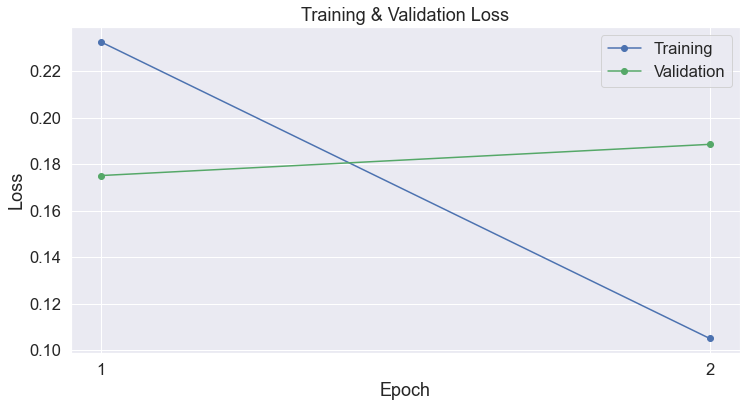

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks(range(1,EPOCHS+1))

plt.show()

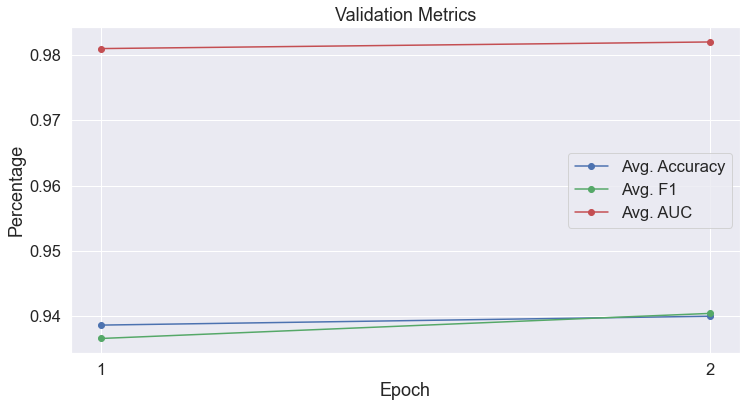

In [ ]:
plt.plot(df_stats['Avg. Accuracy'], 'b-o', label="Avg. Accuracy")
plt.plot(df_stats['Avg. F1'], 'g-o', label="Avg. F1")
plt.plot(df_stats['Avg. AUC'], 'r-o', label="Avg. AUC")

# Label the plot.
plt.title("Validation Metrics")
plt.xlabel("Epoch")
plt.ylabel("Percentage")
plt.legend()
plt.xticks(range(1,EPOCHS+1))

plt.show()

# Generate predictions on test set

In [ ]:

# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(test.shape[0]))

Number of training sentences: 1,816



In [ ]:
test.sample(3)

,Created,sentence,label,category,Date,Month,Month-str-full
130,2020-06-22 15:15:25 CDT,Anyone who does go on vacation should self-mon...,1,JUNE_TV,2020-06-22 15:15:25,6.0,June
576,2020-04-20 19:00:02 CDT,RAGBRAI cyclists won't be pedaling their way a...,1,APR_NP,2020-04-20 19:00:02,4.0,April
10,2020-04-20 13:15:00 CDT,"For another year, the Great Smoky Mountains is...",0,APR_TV,2020-04-20 13:15:00,4.0,April


In [ ]:
# START HERE #
# Create sentence and label lists
sentences = test.sentence.values
labels = test[THESE_LABELS].values

In [ ]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = max_len,           # Pad & truncate all sentences.
                        truncation = True,
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size = BATCH_SIZE)

/Users/yujinkim/opt/anaconda3/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1764: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
test_predictions , test_true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, attention_mask=b_input_mask)

  logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  test_predictions.append(logits)
  test_true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 1,816 test sentences...
    DONE.


## Process prediction results

In [ ]:
from scipy.special import softmax
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [ ]:
# Combine the results across all batches. 
flat_test_predictions = np.concatenate(test_predictions, axis=0)

# For each sample, pick the label (0 or 1) with the higher score.
flat_test_predictions = np.argmax(flat_test_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_test_true_labels = np.concatenate(test_true_labels, axis=0)

tn, fp, fn, tp = confusion_matrix(y_true = flat_test_true_labels, y_pred = flat_test_predictions).ravel()
print(f"TN: {tn}\nFP: {fp}\nFN: {fn}\nTP: {tp}")
print("\n")

precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1 = 2*(precision*recall)/(precision+recall)
accuracy = (tp+tn)/(tp+tn+fp+fn)
print(f"Precision: {round(precision,3)}")
print(f"Recall: {round(recall,3)}")
print(f"F1: {round(f1,3)}")
print(f"Accuracy: {round(accuracy,3)}")

softmax_score = softmax(np.concatenate(test_predictions, axis=0), axis = 1)[:,1] #using scores only for positive class, regardless of label with higher score
auc = roc_auc_score(y_true = flat_test_true_labels, y_score = softmax_score) 
print(f"AUC: {round(auc,3)}")

TN: 881
FP: 47
FN: 47
TP: 841


Precision: 0.947
Recall: 0.947
F1: 0.947
Accuracy: 0.948
AUC: 0.979


# Save model

In [ ]:
import os

# Saving best-practices: if you use defaults names for the model, you can reload it using from_pretrained()

output_dir = './save_models/'

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

# Save a trained model, configuration and tokenizer using `save_pretrained()`.
# They can then be reloaded using `from_pretrained()`
model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Good practice: save your training arguments together with the trained model
# torch.save(args, os.path.join(output_dir, 'training_args.bin'))

Saving model to ./save_models/


('./save_models/vocab.txt',
 './save_models/special_tokens_map.json',
 './save_models/added_tokens.json')

In [ ]:
# Load a trained model and vocabulary that you have fine-tuned
model = model_class.from_pretrained(output_dir)
tokenizer = tokenizer_class.from_pretrained(output_dir)

# Copy the model to the GPU.
model.to(device)

NameError: name 'tokenizer_class' is not defined

## Load previous model and predict

In [ ]:
#Output file name
import datetime
now = datetime.datetime.now()
OUTPUT_FNAME = f"{now.year}-{now.month}-{now.day}_{now.hour}{now.minute}_{THESE_LABELS}_predictions.csv"
print("This will be the name of the output file: ", OUTPUT_FNAME)


In [ ]:
# merge multiple columns into one column

import pandas as pd   
new_predictions = pd.read_csv("new_predictions.csv")


cols = ['Message', 'Link Text', 'Description']

new_predictions['sentence'] = new_predictions[cols].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)

sentences = new_predictions.sentence.values


In [ ]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = max_len,           # Pad & truncate all sentences.
                        truncation = True,
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
#labels = torch.tensor(labels)

# Create the DataLoader.
#prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_data = TensorDataset(input_ids, attention_masks)

prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size = BATCH_SIZE)

In [ ]:
# Prediction on test set

t0 = time.time()

print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
test_predictions , test_true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, attention_mask=b_input_mask)

  logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  test_predictions.append(logits)
  test_true_labels.append(label_ids)

print('    DONE.')
print("Total prediction took {:} (h:mm:ss)".format(format_time(time.time()-t0)))

In [ ]:
from scipy.special import softmax
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

# Combine the results across all batches. 
flat_test_predictions = np.concatenate(test_predictions, axis=0)

# For each sample, pick the label (0 or 1) with the higher score.
flat_test_predictions = np.argmax(flat_test_predictions, axis=1).flatten()

# # Combine the correct labels for each batch into a single list.
# flat_test_true_labels = np.concatenate(test_true_labels, axis=0)

# tn, fp, fn, tp = confusion_matrix(y_true = flat_test_true_labels, y_pred = flat_test_predictions).ravel()
# print(f"TN: {tn}\nFP: {fp}\nFN: {fn}\nTP: {tp}")
# print("\n")

# precision = tp/(tp+fp)
# recall = tp/(tp+fn)
# f1 = 2*(precision*recall)/(precision+recall)
# accuracy = (tp+tn)/(tp+tn+fp+fn)
# print(f"Precision: {round(precision,3)}")
# print(f"Recall: {round(recall,3)}")
# print(f"F1: {round(f1,3)}")
# print(f"Accuracy: {round(accuracy,3)}")

# softmax_score = softmax(np.concatenate(test_predictions, axis=0), axis = 1)[:,1] #using scores only for positive class, regardless of label with higher score
# auc = roc_auc_score(y_true = flat_test_true_labels, y_score = softmax_score) 
# print(f"AUC: {round(auc,3)}")

new_predictions["raw_score_0"] = np.concatenate(test_predictions, axis=0)[:,0]
new_predictions["raw_score_1"] = np.concatenate(test_predictions, axis=0)[:,1]
new_predictions["predictions"] = flat_test_predictions

new_predictions["predictions"] = flat_test_predictions

new_predictions.to_csv("prediction_results/"+OUTPUT_FNAME, encoding='utf-8-sig')

# END